In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Top_1000_IMDb_movies_New_version.csv", index_col=0 )

df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df['Votes'] = df['Votes'].astype(int)

convert = ['Year of Release', 'Gross']
df[convert] = df[convert].apply(pd.to_numeric, errors='coerce')

df = df.dropna()

Text(0, 0.5, 'Average Metascore')

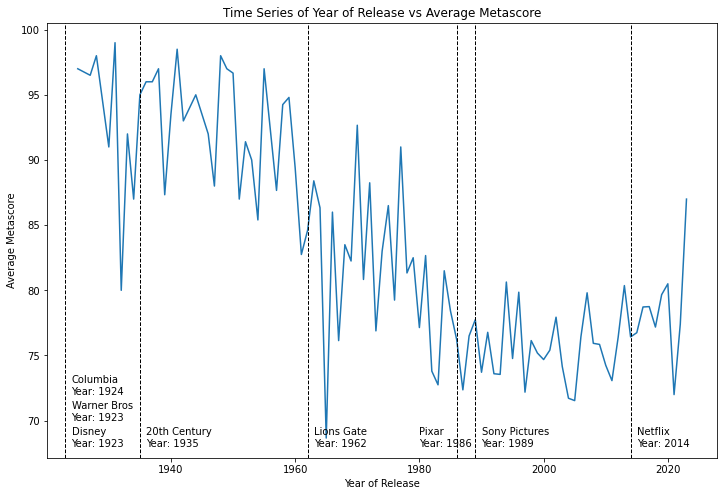

In [37]:
x = df['Year of Release']
y = df['Metascore of movie']

# Group data by Year of Release and calculate the average Metascore for each year
df_avg_metascore = df.groupby('Year of Release')['Metascore of movie'].mean().reset_index()

plt.figure(figsize=(12, 8)) 

plt.annotate(
    "Disney\nYear: 1923",
    xy=(1923, 70),  
    xytext=(1924, 68),  
)
plt.annotate(
    "Warner Bros\nYear: 1923",
    xy=(1923, 70),  
    xytext=(1924, 70),  
)

plt.annotate(
    "Columbia\nYear: 1924",
    xy=(1923, 70),  
    xytext=(1924, 72),  
)

plt.annotate(
    "20th Century\nYear: 1935",
    xy=(1935, 70), 
    xytext=(1936, 68), 
)

plt.annotate(
    "Lions Gate\nYear: 1962",
    xy=(1962, 70), 
    xytext=(1963, 68), 
)
plt.annotate(
    "Pixar\nYear: 1986",
    xy=(1986, 70), 
    xytext=(1980, 68), 
)

plt.annotate(
    "Sony Pictures\nYear: 1989",
    xy=(1989, 70), 
    xytext=(1990, 68), 
)

plt.annotate(
    "Netflix\nYear: 2014",
    xy=(2014, 70), 
    xytext=(2015, 68), 
)


plt.plot(df_avg_metascore['Year of Release'], df_avg_metascore['Metascore of movie'])
plt.axvline(x=1923, color='black', linestyle='--', linewidth=1)
plt.axvline(x=1935, color='black', linestyle='--', linewidth=1)
plt.axvline(x=1962, color='black', linestyle='--', linewidth=1)
plt.axvline(x=1986, color='black', linestyle='--', linewidth=1)
plt.axvline(x=1989, color='black', linestyle='--', linewidth=1)
plt.axvline(x=2014, color='black', linestyle='--', linewidth=1)
# sns.regplot(x=x, y=y, color='red', scatter=False)
plt.title('Time Series of Year of Release vs Average Metascore')
plt.xlabel('Year of Release')
plt.ylabel('Average Metascore')

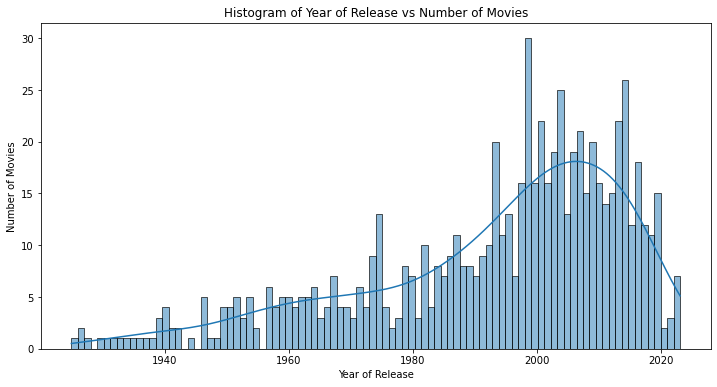

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Year of Release'], kde=True, bins=df['Year of Release'].nunique())
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.title('Histogram of Year of Release vs Number of Movies')

plt.show()

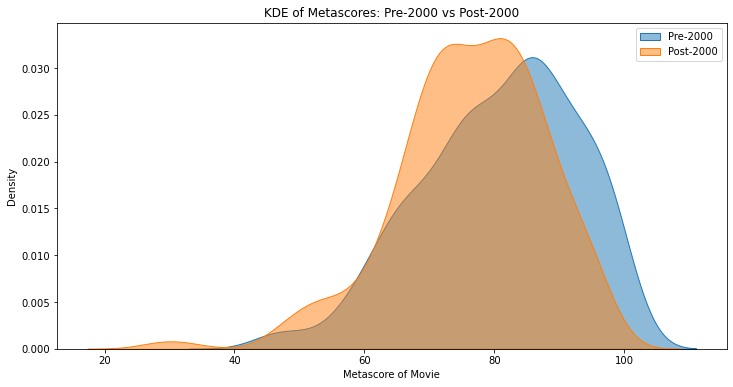

In [45]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Year of Release'] < 2000]['Metascore of movie'], label='Pre-2000', fill=True, alpha=0.5)
sns.kdeplot(df[df['Year of Release'] >= 2000]['Metascore of movie'], label='Post-2000', fill=True, alpha=0.5)
plt.title('KDE of Metascores: Pre-2000 vs Post-2000')
plt.xlabel('Metascore of Movie')
plt.ylabel('Density')
plt.legend()
plt.show()

In [50]:
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(df[df['Year of Release'] < 2000]['Metascore of movie'], df[df['Year of Release'] >= 2000]['Metascore of movie'], equal_var=False)
print(stat)
print(p_value)

5.125789896961158
3.806114801447783e-07
